In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load dataset
df = pd.read_csv('countries-table.csv')

In [4]:
# Tampilkan beberapa baris data
print(df.head())

# Deskripsi statistik dasar
print(df.describe())

# Cek missing values
print(df.isnull().sum())

   place    pop1980     pop2000     pop2010     pop2023     pop2024  \
0    356  687354000  1057920000  1243480000  1438070000  1450940000   
1    156  983164000  1269580000  1351560000  1422580000  1419320000   
2    840  229859000   281484000   311063000   343477000   345427000   
3    360  148951000   216078000   246305000   281190000   283488000   
4    586   82291000   154879000   199239000   247504000   251269000   

      pop2030     pop2050        country       area  landAreaKm cca2 cca3  \
0  1525140000  1679590000          India  3287590.0   2973190.0   IN  IND   
1  1398150000  1260290000          China  9706961.0   9424702.9   CN  CHN   
2   355650000   380847000  United States  9372610.0   9147420.0   US  USA   
3   295877000   320713000      Indonesia  1904569.0   1877519.0   ID  IDN   
4   276883000   371864000       Pakistan   881912.0    770880.0   PK  PAK   

   unMember  netChange  growthRate  worldPercentage   density  densityMi  rank  
0      True     0.4119      0

In [6]:
# Pisahkan kolom numerik dan non-numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Imputasi missing values hanya pada kolom numerik
imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Untuk kolom kategori, Anda bisa mengisi missing values dengan modus atau strategi lain
imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Cek kembali apakah missing values sudah ditangani
print(df.isnull().sum())


place              0
pop1980            0
pop2000            0
pop2010            0
pop2023            0
pop2024            0
pop2030            0
pop2050            0
country            0
area               0
landAreaKm         0
cca2               0
cca3               0
unMember           0
netChange          0
growthRate         0
worldPercentage    0
density            0
densityMi          0
rank               0
dtype: int64


In [11]:
# Jika ada kolom kategori, lakukan encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [13]:
scaler = StandardScaler()  # atau ganti dengan MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [14]:
# Misalkan kolom terakhir adalah target
X = df_scaled.iloc[:, :-1]
y = df_scaled.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.5650177295649726
R-squared: 0.4993737165645685


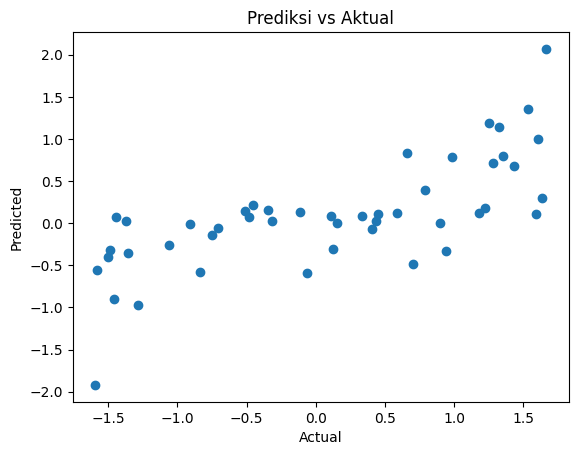

In [16]:
# Inisialisasi dan latih model regresi linear
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred_lin = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualisasi Prediksi vs Aktual
plt.scatter(y_test, y_pred_lin)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Prediksi vs Aktual")
plt.show()


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Inisialisasi dan latih model Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Inisialisasi model regresi lainnya
models = {
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

# Latih model regresi lainnya
for name, model in models.items():
    model.fit(X_train, y_train)

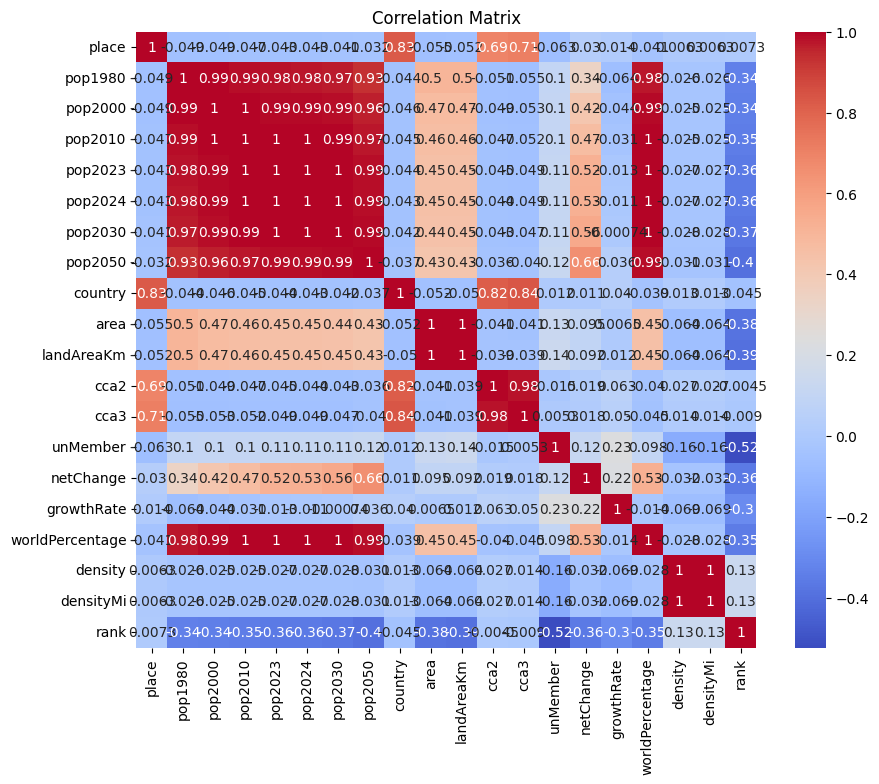

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [1]:
# Hitung Mean Squared Error
model_names = ["Linear Regression", "Decision Tree Regressor", "Random Forest Regressor"]
mse_scores = [
    mean_squared_error(y_test, linear_reg.predict(X_test)),
    mean_squared_error(y_test, models["Decision Tree Regressor"].predict(X_test)),
    mean_squared_error(y_test, models["Random Forest Regressor"].predict(X_test))
]

# Plot hasil Mean Squared Error
plt.bar(model_names, mse_scores, color='skyblue')
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("Performa Model Regresi")
plt.show()


NameError: name 'mean_squared_error' is not defined

In [ ]:
# sampel data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Muat data dari file CSV
df = pd.read_csv('path/to/your/data.csv')

# Hapus kolom non-numerik
df_numeric = df.select_dtypes(include=[float, int])

# Fungsi untuk preprocessing (misalnya, standard scaling)
def some_preprocessing_function(df):
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_scaled

# Lakukan preprocessing
df_scaled = some_preprocessing_function(df_numeric)

# Ambil sampel 1000 data secara acak
df_sample = df_numeric.sample(1000)
df_scaled_sample = df_scaled.sample(1000)

# Plot distribusi data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(df_sample, ax=axes[0])
axes[0].set_title('Distribusi Data Sebelum Preprocessing')
sns.histplot(df_scaled_sample, ax=axes[1])
axes[1].set_title('Distribusi Data Setelah Preprocessing')
plt.show()



ValueError: could not convert string to float: 'India'